# 降维算法2案例-PCA对手写数字数据集的降维

![image.png](./images/39.png)

## 1、导入需要的模块和库

In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 2、导入数据，探索数据

In [2]:
data = pd.read_csv(r"./datasets/digit-recognizor-train.csv")

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(5000, 785)

In [5]:
X = data.iloc[:,1:]

In [6]:
y = data.iloc[:,0]

In [7]:
X.shape

(5000, 784)

In [8]:
y.shape

(5000,)

## 3、画累计方差贡献率曲线，找最佳降维后维度的范围

In [9]:
min(X.shape)

784

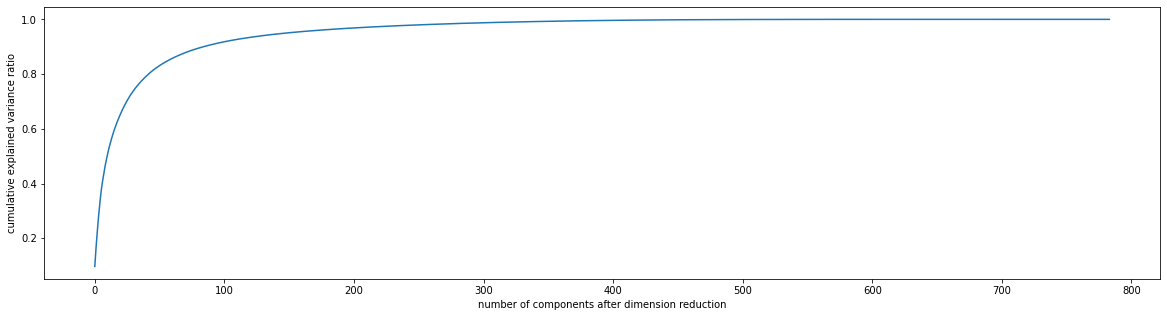

In [10]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

## 4、降维后维度的学习曲线，继续缩小最佳维度的范围

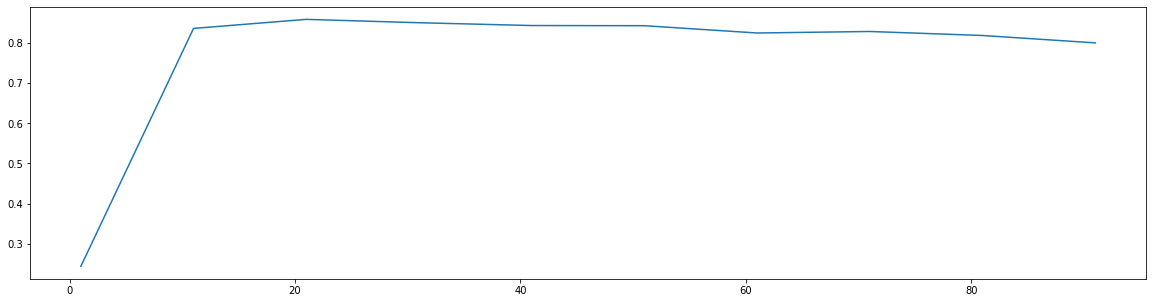

In [12]:
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                          ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

## 5、细化学习曲线，找出降维后的最佳维度

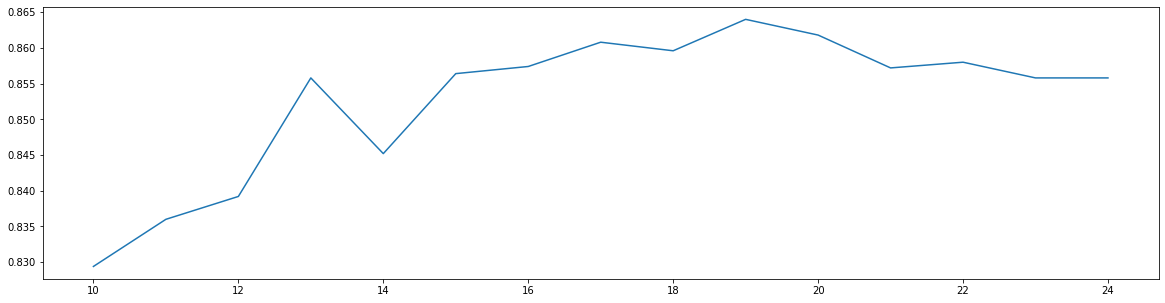

In [14]:
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                          ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)  
plt.show()

## 6、导入找出最佳维度进行降噪，查看模型效果

In [15]:
X_dr = PCA(19).fit_transform(X)

In [17]:
X_dr.shape

(5000, 19)

In [16]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()

0.8588000000000001

In [18]:
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

0.909

没有嵌入法特征选择过后的高，有没有什么办法能够提高模型的表现呢？

## 7、突发奇想，特征数量已经不足原来的3%，换模型怎么样？

![image.png](./images/40.png)

In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,y,cv=5).mean()

0.9376

## 8、KNN的k值学习曲线

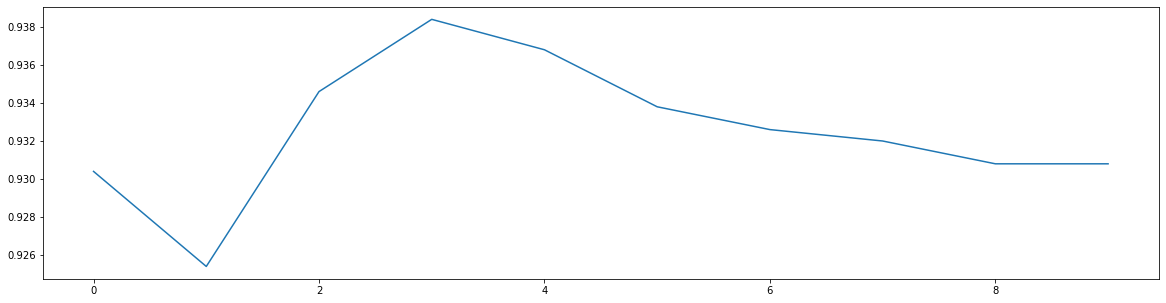

In [20]:
score = []
for i in range(10):
    X_dr = PCA(19).fit_transform(X)
    once = cross_val_score(KNN(i+1)
                          ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)  
plt.show()

In [22]:
max(score)

0.9384

In [27]:
cross_val_score(KNN(4),X_dr,y,cv=5).mean()

0.9381999999999999

## 9、定下超参数后，模型效果如何，模型运行时间如何？

In [25]:
%%timeit
cross_val_score(KNN(4),X_dr,y,cv=5).mean()

1.26 s ± 156 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
KNN(4).fit(X_dr,y).score(X_dr,y)

0.965